In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/crypto-news/cryptonews.csv


# analysing the sentiment about crypto using news headlines

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# importing the data

In [80]:
df=pd.read_csv('/kaggle/input/crypto-news/cryptonews.csv')
df['date'] = pd.to_datetime(df['date']).dt.date
df=df.set_index(pd.DatetimeIndex(df['date'].values))
df.head()

,date,sentiment,source,subject,text,title,url
2022-11-15,2022-11-15,"{'class': 'positive', 'polarity': 0.17, 'subje...",CoinTelegraph,blockchain,With a roster full of entertainment industry n...,Aether Games Sets Sights on Dark Fantasy DeFi ...,https://cointelegraph.com/news/aether-games-se...
2022-11-15,2022-11-15,"{'class': 'negative', 'polarity': -0.07, 'subj...",CoinTelegraph,bitcoin,Blockchain analytics firm Nansen has released ...,FTX debacle sees Nansen take stock of major ex...,https://cointelegraph.com/news/ftx-debacle-see...
2022-11-15,2022-11-15,"{'class': 'positive', 'polarity': 0.05, 'subje...",CoinTelegraph,bitcoin,The hardware wallet firm is certain that the l...,Trezor reports 300% surge in sales revenue due...,https://cointelegraph.com/news/trezor-reports-...
2022-11-15,2022-11-15,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,"Kyle Davies, founder of the collapsed crypto f...",Defunct Billion-Dollar Crypto Hedge Fund Three...,https://cryptonews.com/news/defunct-billion-do...
2022-11-15,2022-11-15,"{'class': 'positive', 'polarity': 0.11, 'subje...",CryptoNews,blockchain,Despite the ongoing crypto market downturn whi...,Billionaire Mark Cuban Still Believes in Crypt...,https://cryptonews.com/news/billionaire-mark-c...


# droping unnecessary features

In [81]:
df.drop(['sentiment','source','url'],axis=1,inplace=True)
df.head()

,date,subject,text,title
2022-11-15,2022-11-15,blockchain,With a roster full of entertainment industry n...,Aether Games Sets Sights on Dark Fantasy DeFi ...
2022-11-15,2022-11-15,bitcoin,Blockchain analytics firm Nansen has released ...,FTX debacle sees Nansen take stock of major ex...
2022-11-15,2022-11-15,bitcoin,The hardware wallet firm is certain that the l...,Trezor reports 300% surge in sales revenue due...
2022-11-15,2022-11-15,blockchain,"Kyle Davies, founder of the collapsed crypto f...",Defunct Billion-Dollar Crypto Hedge Fund Three...
2022-11-15,2022-11-15,blockchain,Despite the ongoing crypto market downturn whi...,Billionaire Mark Cuban Still Believes in Crypt...


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12750 entries, 2022-11-15 to 2021-10-12
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   date     12750 non-null  object
 1   subject  12750 non-null  object
 2   text     12750 non-null  object
 3   title    12750 non-null  object
dtypes: object(4)
memory usage: 498.0+ KB


In [66]:
df.shape

(12750, 4)

# getting the polarity

In [82]:
def getpolarity(text):
    return TextBlob(text).sentiment.polarity
#create polarity new column
df['polarity']=df['text'].apply(getpolarity)
df.head()

,date,subject,text,title,polarity
2022-11-15,2022-11-15,blockchain,With a roster full of entertainment industry n...,Aether Games Sets Sights on Dark Fantasy DeFi ...,0.175000
2022-11-15,2022-11-15,bitcoin,Blockchain analytics firm Nansen has released ...,FTX debacle sees Nansen take stock of major ex...,-0.068750
2022-11-15,2022-11-15,bitcoin,The hardware wallet firm is certain that the l...,Trezor reports 300% surge in sales revenue due...,0.049405
2022-11-15,2022-11-15,blockchain,"Kyle Davies, founder of the collapsed crypto f...",Defunct Billion-Dollar Crypto Hedge Fund Three...,0.000000
2022-11-15,2022-11-15,blockchain,Despite the ongoing crypto market downturn whi...,Billionaire Mark Cuban Still Believes in Crypt...,0.109184


# computing negative,neatural,positive sentiments

In [83]:
def getsentiment(score):
    if score<0:
        return 'negative'
    elif score==0:
        return 'neautral'
    else:
        return 'positive'
# create a new column to store the sentiment
df['sentiment']=df['polarity'].apply(getsentiment)
df.head()       

,date,subject,text,title,polarity,sentiment
2022-11-15,2022-11-15,blockchain,With a roster full of entertainment industry n...,Aether Games Sets Sights on Dark Fantasy DeFi ...,0.175000,positive
2022-11-15,2022-11-15,bitcoin,Blockchain analytics firm Nansen has released ...,FTX debacle sees Nansen take stock of major ex...,-0.068750,negative
2022-11-15,2022-11-15,bitcoin,The hardware wallet firm is certain that the l...,Trezor reports 300% surge in sales revenue due...,0.049405,positive
2022-11-15,2022-11-15,blockchain,"Kyle Davies, founder of the collapsed crypto f...",Defunct Billion-Dollar Crypto Hedge Fund Three...,0.000000,neautral
2022-11-15,2022-11-15,blockchain,Despite the ongoing crypto market downturn whi...,Billionaire Mark Cuban Still Believes in Crypt...,0.109184,positive


# visualizing the results

<AxesSubplot:ylabel='sentiment'>

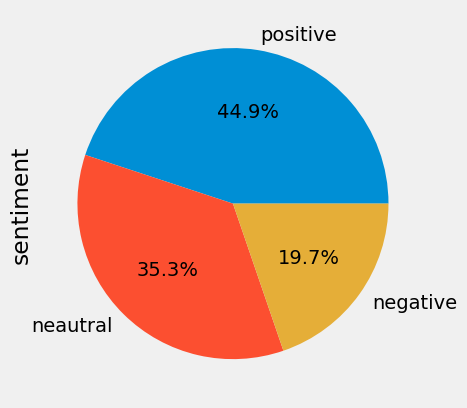

In [84]:
df['sentiment'].value_counts().plot(kind='pie',autopct='%1.1f%%')

# getting polarity average

In [85]:
# get the acount of each article per date
polarity_count=df.groupby(['date']).count()['polarity'].sort_values(ascending=False)
polarity_count

date
2022-05-12    67
2022-11-09    65
2022-06-13    64
2022-04-07    64
2022-06-16    64
              ..
2021-11-13     1
2021-11-14     1
2021-12-07     1
2021-12-02     1
2021-10-12     1
Name: polarity, Length: 374, dtype: int64

In [98]:
polarity_avg=df['polarity']/polarity_count
polarity_avg

2021-10-12    0.156250
2021-10-15    0.000000
2021-10-18    0.136364
2021-10-19    0.100000
2021-10-27    0.000000
                ...   
2022-11-15    0.000000
2022-11-15    0.007917
2022-11-15    0.005556
2022-11-15    0.003667
2022-11-15   -0.033333
Name: polarity, Length: 12750, dtype: float64

# visualizing polarity average over time

Text(0.5, 1.0, 'sentiment average over time')

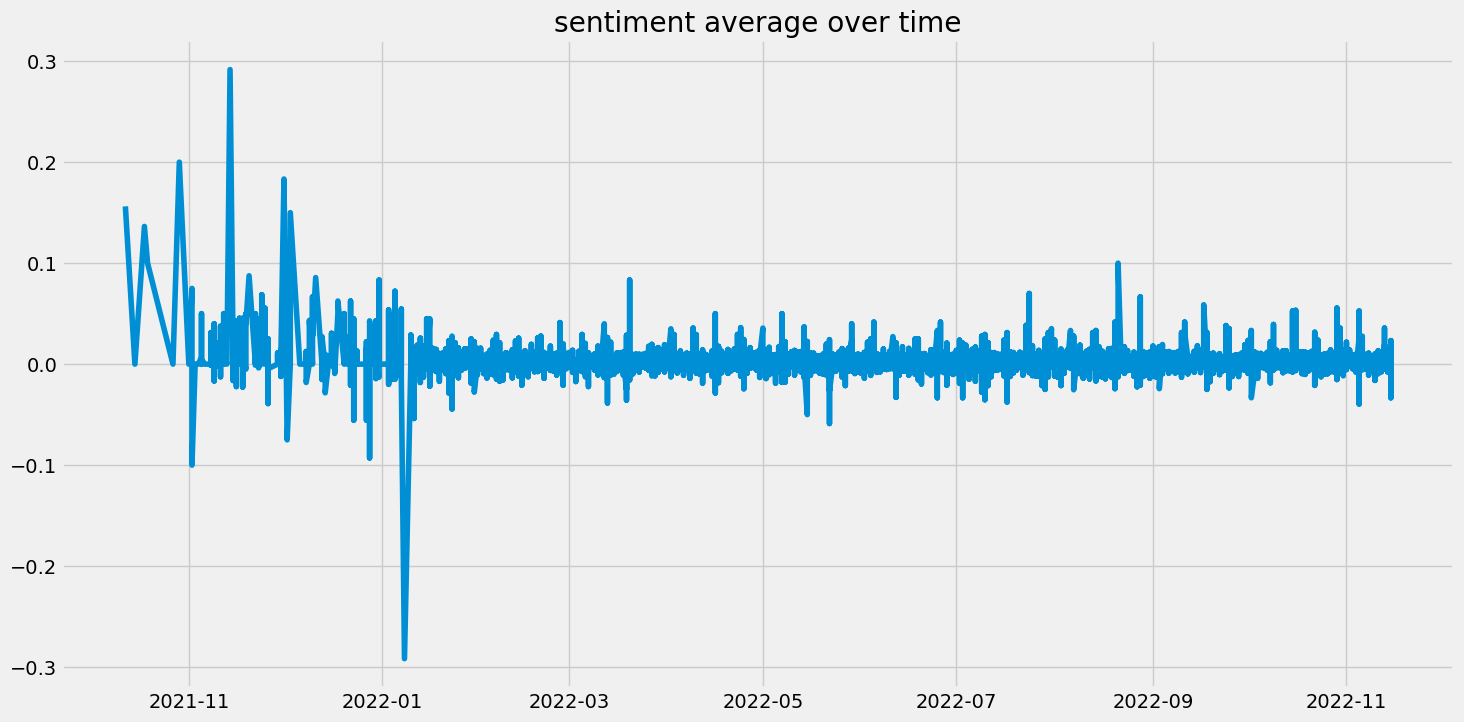

In [99]:
plt.figure(figsize=(16,8))
plt.plot(polarity_avg.index,polarity_avg)
plt.title('sentiment average over time')

# visualizing 2021 dataset average polarity

In [105]:
data=df['2021':'2021']
data

,date,subject,text,title,polarity,sentiment
2021-12-09,2021-12-09,bitcoin,The public has not been told how the coins are...,Lack of Transparency Blighting El Salvador's B...,0.000000,neautral
2021-12-09,2021-12-09,ethereum,"Get your daily, bite-sized digest of cryptoass...",Polygon Makes USD 400M Bet On Ethereum Scaling...,0.000000,neautral
2021-12-09,2021-12-09,bitcoin,The hashrate doubled since July.,Bitcoin Hashrate Close to Full Recovery After ...,0.000000,neautral
2021-12-09,2021-12-09,bitcoin,It is possible that \x9cdedicated investors kn...,"Rising Number Of Investors Sell Stocks, Bonds ...",0.137500,positive
2021-12-09,2021-12-09,altcoin,'Payments will appear directly in people's chat.',Meta Tests Stablecoin Transfers via WhatsApp,0.100000,positive
...,...,...,...,...,...,...
2021-10-27,2021-10-27,defi,Cream Finance (CREAM) suffered another flash l...,Cream Finance Suffers Another Exploit as Attac...,0.000000,neautral
2021-10-19,2021-10-19,blockchain,Banque de France disclosed the results of its ...,French Central Bank's Blockchain Bond Trial Br...,0.100000,positive
2021-10-18,2021-10-18,blockchain,Advancing its project to become \x9caÂ\xa0meta...,"Facebook To Add 10,000 Jobs In EU For Metavers...",0.136364,positive
2021-10-15,2021-10-15,blockchain,Chinese companies are still topping the blockc...,Tech Crackdown Hasn't Halted Chinese Firms' Bl...,0.000000,neautral


In [106]:
# get the acount of each article per date
polarity_count=data.groupby(['date']).count()['polarity'].sort_values(ascending=False)
polarity_count

date
2021-11-10    12
2021-11-30    11
2021-12-13    11
2021-11-18    11
2021-11-17    11
2021-12-14    11
2021-11-09    10
2021-11-24    10
2021-11-19    10
2021-11-15    10
2021-12-09    10
2021-11-11    10
2021-11-12    10
2021-11-05    10
2021-12-27     9
2021-12-17     9
2021-11-29     9
2021-12-10     9
2021-12-23     9
2021-11-25     9
2021-11-23     9
2021-12-16     9
2021-11-22     9
2021-12-29     8
2021-11-08     8
2021-12-22     8
2021-11-26     8
2021-12-28     7
2021-12-24     7
2021-12-30     7
2021-11-16     7
2021-12-15     6
2021-12-31     6
2021-12-21     5
2021-12-20     5
2021-12-08     4
2021-11-04     3
2021-11-03     3
2021-12-06     2
2021-11-02     2
2021-12-03     2
2021-12-18     2
2021-10-18     1
2021-10-19     1
2021-10-27     1
2021-10-29     1
2021-12-25     1
2021-11-01     1
2021-12-02     1
2021-11-06     1
2021-11-13     1
2021-11-14     1
2021-11-20     1
2021-12-11     1
2021-10-15     1
2021-12-01     1
2021-12-07     1
2021-10-12     1
Name: pol

In [108]:
polarity_average=data['polarity']/polarity_count
polarity_average

2021-10-12    0.156250
2021-10-15    0.000000
2021-10-18    0.136364
2021-10-19    0.100000
2021-10-27    0.000000
                ...   
2021-12-31    0.000000
2021-12-31    0.008333
2021-12-31    0.083333
2021-12-31    0.000000
2021-12-31    0.000000
Name: polarity, Length: 344, dtype: float64

Text(0.5, 1.0, 'sentiment average over 2021')

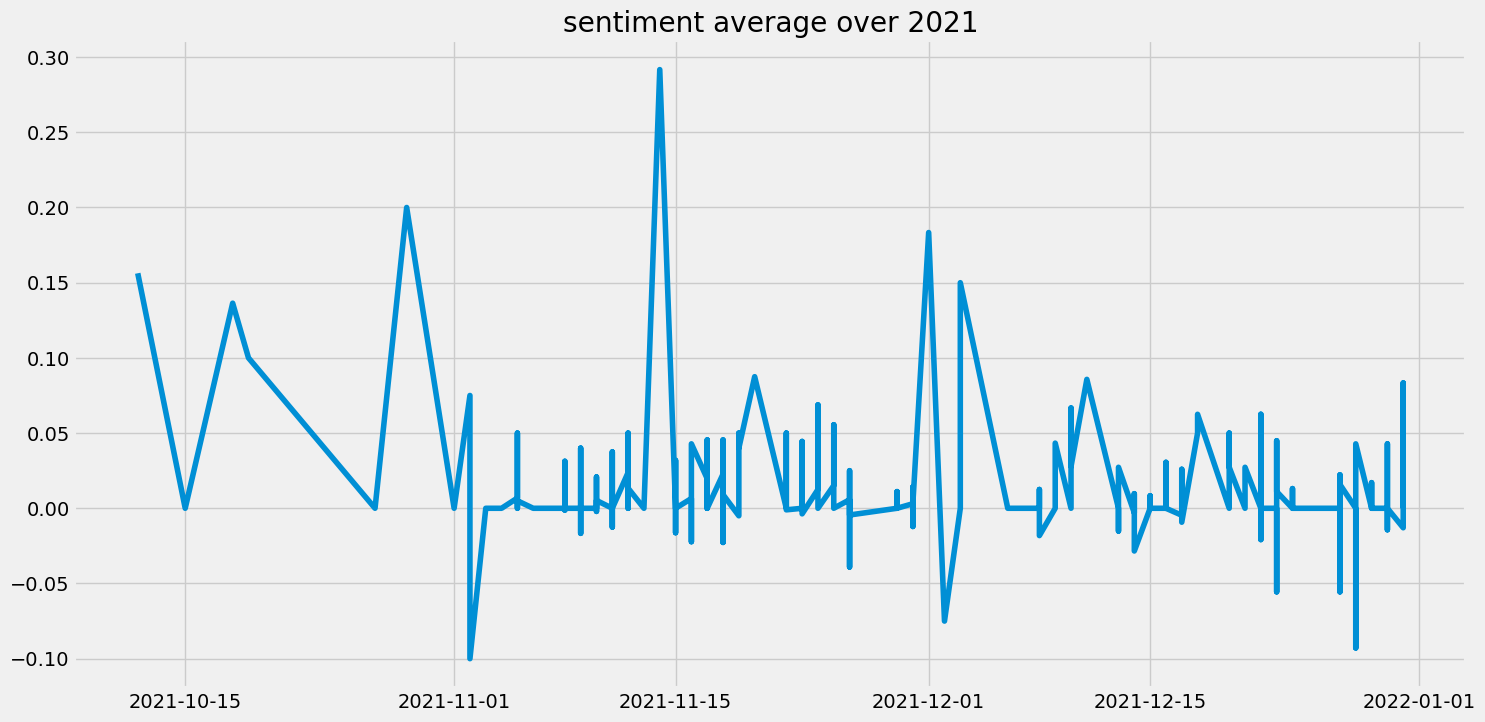

In [110]:
plt.figure(figsize=(16,8))
plt.plot(polarity_average.index,polarity_avg)
plt.title('sentiment average over 2021')

# as wee see more positive news was approximately on 2021-11-13 and more negative was on 2021-11-2